# Analysis of World Historical and Predicted Population

The following notebook provides a simple analysis of global demographic data.

First, let's import the necessary librairies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Then, we need the data file. If it doesn't already exist locally, we'll create it.

In [2]:
inputFileName = "World_historical_and_predicted_populations_in_percentage.csv"
import os
if not os.path.exists(inputFileName):
    import urllib2
    response = urllib2.urlopen("http://inveniosoftware.org/download/invenio-demo-site-files/World_historical_and_predicted_populations_in_percentage.csv")
    filecontent = response.read()   
    with open(inputFileName,"w") as f_out:
        f_out.write(filecontent)

## First manipulations

It will be easier to analyze the table once it's transposed. That way, dates are assimilated to an index and we can manipulate the data by region.

In [3]:
def transpose(inputFileName):
    # Transpose rows and columns
    import csv
    from itertools import izip    
    with open(inputFileName, "rU") as f, open('World_Pop_Evolution.csv', "wb") as fout:
        csv.writer(fout).writerows(izip(*csv.reader(f)))

In [4]:
transpose(inputFileName=inputFileName)

That's it! We can now finally start reading from the file.

In [5]:
pop=pd.read_csv("World_Pop_Evolution.csv")

# Remove the World column
pop.drop('World', axis=1, inplace=True)

pop.head()

,Region,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
0,1500,18.8,53.1,18.3,8.5,0.7,0.7
1,1600,19.7,58.4,19.1,1.7,0.5,0.5
2,1700,15.5,63.9,18.3,1.5,0.3,0.4
3,1750,13.4,63.5,20.6,2.0,0.3,0.3
4,1800,10.9,64.9,20.8,2.5,0.7,0.2


## Regional Analysis

We'll start with a histogram depicting the evolution of a specific region's portion of the world population, in percentage.

In [6]:
def histogram_by_region(region):
    local_pop=pop[['Region', str(region)]].groupby('Region').sum()
    
    plot=local_pop.plot(kind='bar', legend=None, title='Percentage of World Population over time in '+ str(region))
    
    plot.set_ylabel('% of world population')
    plot.set_xlabel('')

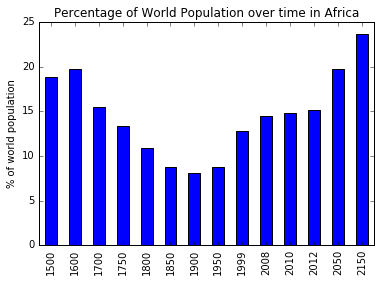

In [7]:
histogram_by_region('Africa')

## Global Analysis

Finally, let's draw a histogram representing the evolution of each geographical region's percentage of world population.

To do this, we can create an auxiliary function which adds the bars corresponding to a region on top of the previous ones, on the final plot.

In [8]:
# Add the corresponding region's population
def create_bar_plot(i, data, hist_plot, bar_l, bar_width, colors, bottom):
    region_name=data.columns.values[i]
    
    # Plot at x=0 if first region
    if (i==0):
        hist_plot.bar(bar_l, data[region_name], width=bar_width, label=region_name, color=colors[i])
        return
    
    # Plot at position bar_l, on top of the cumulative sum of the population of previous regions
    hist_plot.bar(bar_l, data[region_name], width=bar_width, label=region_name, color=colors[i], bottom=bottom[data.columns.values[i-1]])    

In [9]:
def evolution_pop_histogram(pop):
    # Create the plot and bars
    f, hist_plot=plt.subplots(1, figsize=(15,10))
    
    # Width of a time bar
    bar_width = 0.4
    
    # Positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(pop['Region']))]
    
    # Basic colors  
    colors = ['g', 'y', 'r', 'b', 'm', 'c']
    
    # Data without time values
    data=pop[[pop.columns.values[i+1] for i in range(len(pop.columns)-1)]]
    
    # Cumulative sum over percentages
    bottom = data.cumsum(axis=1)
    
    # Create bar plot for each region    
    for i in range(len(data.columns)):
        create_bar_plot(i, data=data, hist_plot=hist_plot, bar_l=bar_l, bar_width=bar_width, colors=colors, bottom=bottom)
    
    # Add time labels
    label_pos = [i + (bar_width/2) for i in bar_l]
    plt.xticks(label_pos, pop['Region'])
    
    # Set upper limit for the y-axis    
    axes = plt.gca()
    axes.set_ylim([0,105])
    
    # Set labels and legend
    hist_plot.set_ylabel("Percentage of World Population")
    hist_plot.set_title("Historical and Predicted Percentage of World Population per Region")
    plt.legend(loc=9, bbox_to_anchor=(0.5, 1.05), ncol=3)    

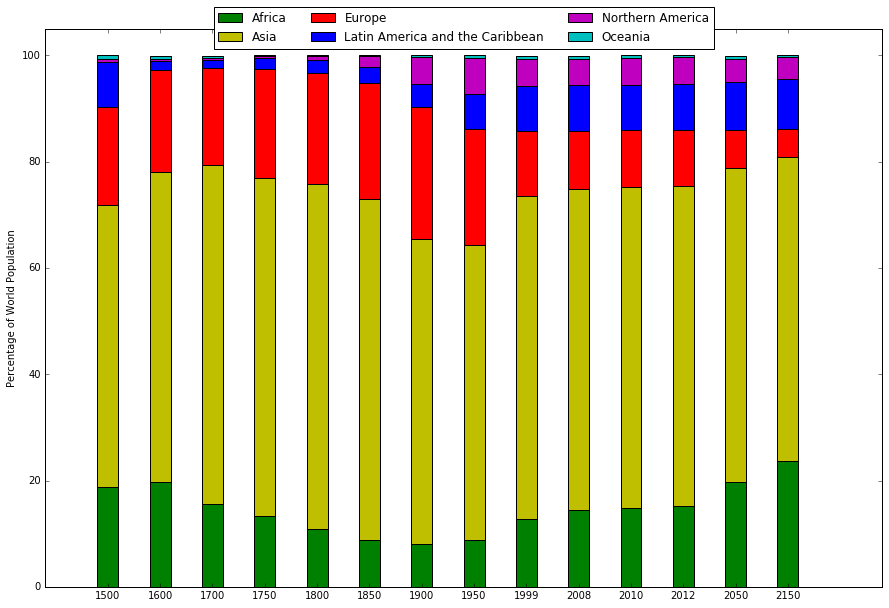

In [10]:
evolution_pop_histogram(pop)